In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import json
import os

In [3]:
data_dir = './he_result'

users = list(os.listdir(data_dir))

data = []

# exps = [{
#     'label': 'Direct Prompting(4o) vs Direct Prompting(DeepSeek)',
#     'file': 'Direct Prompting (4o) vs Direct Prompting (DeepSeek).json'
# }, {
#     'label': 'Direct Prompting(4o) vs LPCoder(DeepSeek Absolute)',
#     'file': 'Direct Prompting (4o) vs LPCoder (DeepSeek Absolute).json'
# }, {
#     'label': 'LPCoder(Best) vs Direct Prompting',
#     'file': 'LPCoder (4o Best) vs Direct Prompting (4o).json'
# }, {
#     'label': 'LPCoder(Best) vs Self Revision',
#     'file': 'LPCoder (4o Best) vs Self Revision (4o).json'
# }, {
#     'label': 'LPCoder(Best) vs Text Augmented',
#     'file': 'LPCoder (4o Best) vs Text Augmented (4o).json'
# }, {
#     'label': 'LPCoder(Best) vs DCGen',
#     'file': 'LPCoder (4o Best) vs DCGen.json'
# }]
exps = [{
    'label': 'Direct',
    'file': 'Direct Prompting (4o) vs Direct Prompting (DeepSeek).json'
}, {
    'label': 'LPCoder (APS)',
    'file': 'Direct Prompting (4o) vs LPCoder (DeepSeek Absolute).json'
}, {
    'label': 'Direct',
    'file': 'LPCoder (4o Best) vs Direct Prompting (4o).json'
}, {
    'label': 'Text-Augmented',
    'file': 'LPCoder (4o Best) vs Text Augmented (4o).json'
},{
    'label': 'Self-Revision',
    'file': 'LPCoder (4o Best) vs Self Revision (4o).json'
},  {
    'label': 'DCGen',
    'file': 'LPCoder (4o Best) vs DCGen.json'
}]



for exp in exps:
    data_item = {
        'label': exp['label'],
        'result': [0, 0, 0]
    }
    temp = None
    for user in users:
        path = f'{data_dir}/{user}/{exp["file"]}'
        with open(path, 'r') as f:
            a = json.load(f)
            if not temp:
                temp = a
            else:
                for key in a.keys():
                    temp[key] += a[key]
    
    for val in temp.values():
        if val > 3:
            data_item['result'][0] += 1
        elif val == 3:
            data_item['result'][1] += 1
        else:
            data_item['result'][2] += 1
    data.append(data_item)
    

In [4]:
data

[{'label': 'Direct', 'result': [64, 12, 52]},
 {'label': 'LPCoder (APS)', 'result': [91, 5, 32]},
 {'label': 'Direct', 'result': [79, 14, 35]},
 {'label': 'Text-Augmented', 'result': [86, 19, 23]},
 {'label': 'Self-Revision', 'result': [88, 14, 26]},
 {'label': 'DCGen', 'result': [102, 9, 17]}]

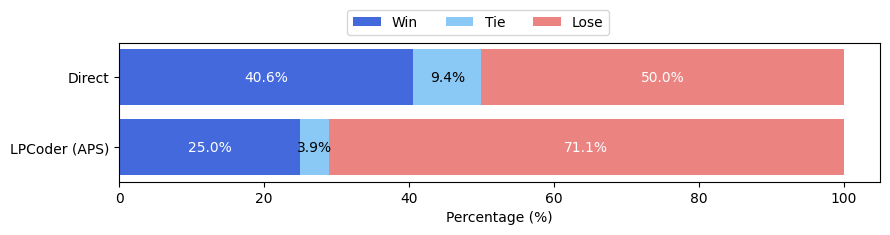

In [ ]:
data_ = data[:2][::-1]

models = list(map(lambda x:x['label'], data_))

# Win, Tie, Lose 
win = []
tie = []
lose = []
for item in data_:
    result = item['result']
    win.append(result[2]*100/128)
    tie.append(result[1]*100/128)
    lose.append(result[0]*100/128)
win = np.array(win)
tie = np.array(tie)
lose = np.array(lose)

fig, ax = plt.subplots(figsize=(9, 2.6))

ax.barh(models, win, color='#4369dd', label='Win')
ax.barh(models, tie, left=win, color='#8ac9f6', label='Tie')
ax.barh(models, lose, left=win + tie, color='#eb8381', label='Lose')

for i, model in enumerate(models):

    ax.text(win[i] / 2, i, f'{win[i]:.1f}%', va='center', ha='center', color='white', fontsize=10)
    

    ax.text(win[i] + tie[i] / 2, i, f'{tie[i]:.1f}%', va='center', ha='center', color='black', fontsize=10)
    

    ax.text(win[i] + tie[i] + lose[i] / 2, i, f'{lose[i]:.1f}%', va='center', ha='center', color='white', fontsize=10)


ax.set_xlabel('Percentage (%)')
# ax.set_title('4o vs other methods')


ax.legend(loc='upper left', bbox_to_anchor=(0.3, 1.24), borderaxespad=0, ncol=3)


plt.tight_layout()
# plt.show()
plt.savefig('preference_deepseek.pdf', dpi=300, bbox_inches='tight')

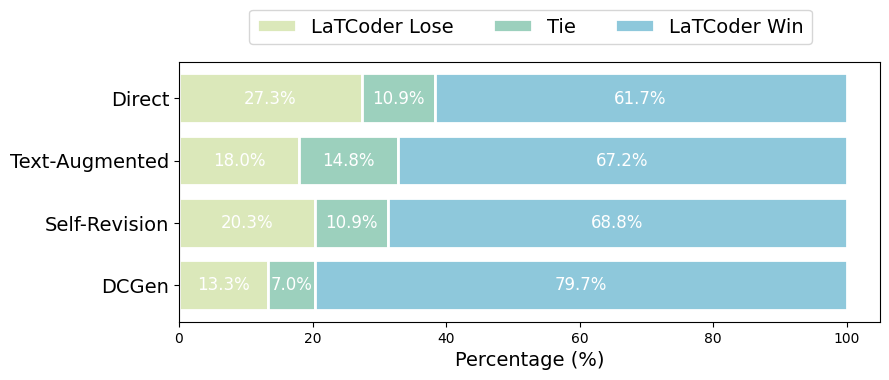

In [ ]:
data_ = data[2:][::-1]

models = list(map(lambda x:x['label'], data_))


win = []
tie = []
lose = []
for item in data_:
    result = item['result']
    win.append(result[2]*100/128)
    tie.append(result[1]*100/128)
    lose.append(result[0]*100/128)
win = np.array(win)
tie = np.array(tie)
lose = np.array(lose)


fig, ax = plt.subplots(figsize=(9, 4))

ax.barh(models, win, color='#dbe8ba', edgecolor='white', linewidth=2 , label='LaTCoder Lose')  # 
ax.barh(models, tie, left=win, color='#9cd0bd', edgecolor='white', linewidth=2 , label='Tie')  # 
ax.barh(models, lose, left=win + tie, color='#8ec8db', edgecolor='white', linewidth=2 , label='LaTCoder Win')  # 

# 
for i, model in enumerate(models):
    # Win 
    ax.text(win[i] / 2, i, f'{win[i]:.1f}%', va='center', ha='center', color='white', fontsize=12)
    
    # Tie 
    ax.text(win[i] + tie[i] / 2, i, f'{tie[i]:.1f}%', va='center', ha='center', color='white', fontsize=12)
    
    # Lose 
    ax.text(win[i] + tie[i] + lose[i] / 2, i, f'{lose[i]:.1f}%', va='center', ha='center', color='white', fontsize=12)

# 
ax.set_xlabel('Percentage (%)', fontsize=14) 
# ax.set_title('LPCoder vs other methods')
ax.tick_params(axis='y', labelsize=14)

# 
ax.legend(loc='upper left', bbox_to_anchor=(0.1, 1.2), borderaxespad=0, ncol=3, fontsize=14) 

# 
plt.tight_layout()
# plt.show()
plt.savefig('preference_methods.pdf', dpi=300, bbox_inches='tight')
